MNIST

L'ensemble de données Fashion-MNIST est un ensemble de données d'images d'articles de Zalando, avec des images en nuances de gris 28 x 28 de 70 000 produits de mode provenant de 10 catégories et 7 000 images par catégorie.

L'ensemble d'entrainement contient 60 000 images et l'ensemble de test contient 10 000 images.

Fashion-MNIST est similaire à l'ensemble de données MNIST que vous connaissez peut-être déjà, que vous utilisez pour classer les chiffres manuscrits. Cela signifie que les dimensions de l'image, les divisions d'entraînement et de test sont similaires à celles de l'ensemble de données MNIST.

**DISCLAIMER**

Assurez-vous d'utiliser votre GPU (Google Colab ou si vous disposez d'un GPU NVIDIA)

In [1]:
# importation des modules nécessaires pour l'entrainement
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Supression des alertes
import logging
logging.getLogger('tensorflow').disabled = True

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# chargement des données
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# vérification des dimensions des images
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Trouver les numéros uniques sur les étiquettes d'entrainement
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes) # il y a donc 10 classes de sorties allant de 0 à 9

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Mapping pour une meilleure comprehension
class_names = ['T-shirt / haut', 'Pantalon', 'Pullover', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Sneaker', 'Sac', 'Bottine']

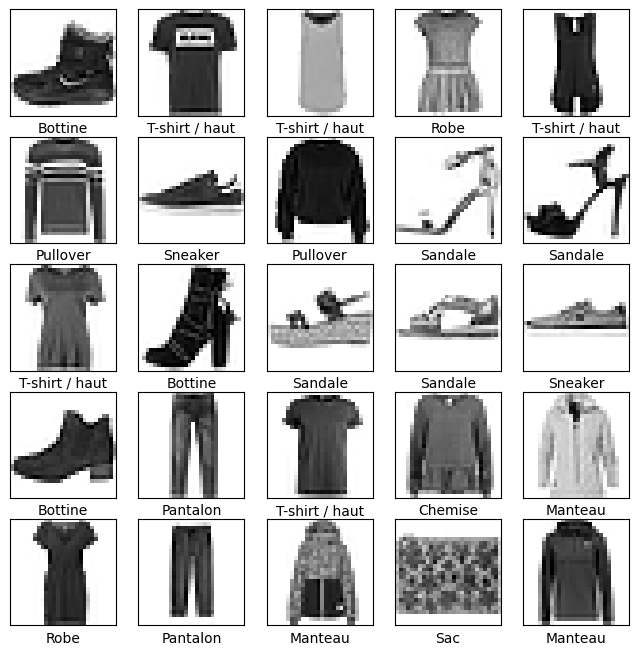

In [6]:
# visualisation des 10 premieres images avant analyses
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Les données sont actuellement au format int8, donc avant de les introduire dans le réseau, on doit convertir leur type en float32, et également redimensionner les valeurs de pixels dans la plage 0 à 1 inclus.

In [7]:
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = x_train / 255.
test_X = x_test / 255.

CREER ET CONSTRUIRE RESEAU DE NEURONES CNN

In [8]:
# Nous commençons par initialiser le modele
modele = tf.keras.models.Sequential()

# Nous commençons par une couche convolutive qui extraira les fonctionnalités des
# images d'entrée en faisant glisser un filtre de convolution sur l'image d'entrée,
# il en résulte une Feature Map (carte des fonctionnalités).
modele.add(
    tf.keras.layers.Conv2D(
        filters=32, # nombre de filtres pour l'entrainement
        kernel_size=(3, 3), # Taille de la feature map
        strides=(1, 1), # Comment la carte des caractéristiques "parcourt" l'image
        padding='valid', # Nous n'utilisons pas de padding
        activation='relu', # Fonction d'activation d'unité linéaire rectifiée
        input_shape=(28, 28, 1) # La forme d'entrée attendue pour cette couche
    )
)

# La couche suivante que nous ajouterons est une couche Maxpooling. Cela réduira la
# dimension de chaque fonctionnalité, ce qui réduit le nombre de paramètres sur lesquels
# le modèle doit apprendre, ce qui réduit le temps d'entrainement.
modele.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # taille de la feature à mapper
        strides=(2, 2) # Comment le pool "parcourt" la fonctionnalité
    )
)

# Nous allons maintenant ajouter une couche DROPOUT. Lutte contre le surapprentissage et force le modèle à
# apprendre plusieurs représentations des mêmes données en désactivant aléatoirement les neurones
# en phase d'apprentissage.
modele.add(
    tf.keras.layers.Dropout(
        rate = 0.25 # Désactiver aléatoirement 25 % des neurones
    )
)

# on ajoute des couches supplementaires
modele.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)
    )
)

modele.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    )
)

modele.add(
    tf.keras.layers.Dropout(
        rate = 0.25
    )
)

# on ajoute des couches supplementaires
modele.add(
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)
    )
)

modele.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    )
)

modele.add(
    tf.keras.layers.Dropout(
        rate = 0.25
    )
)


# La sortie de la couche précédente est un tenseur 3D. Cela doit être aplati en 1D
# vecteur avant d'être envoyé aux couches denses.
modele.add(
    tf.keras.layers.Flatten()
)

# Une couche dense (interconnectée) est ajoutée pour cartographier les entités dérivées
# à la classe requise.
modele.add(
    tf.keras.layers.Dense(
        units = 128, # Forme de sortie
        activation='relu' # Fonction d'activation d'unité linéaire rectifiée
    )
)

# Couche finale avec 10 sorties et une activation softmax. Activation Softmax
# me permet de calculer le résultat en fonction des probabilités.
# Chaque classe se voit attribuer une probabilité et la classe avec le maximum
# La probabilité est la sortie du modèle pour l'entrée.
modele.add(
    tf.keras.layers.Dense(
        units = 10, # Forme de sortie
        activation='softmax' # Fonction d'activation Softmax
    )
)

# Construction du modèle
modele.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # fonction de perte
    optimizer=tf.keras.optimizers.Adam(), # fonction d'optimisation
    metrics=['accuracy'] # métrique de rapport
)

# Afficher un résumé de la structure des modèles
modele.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

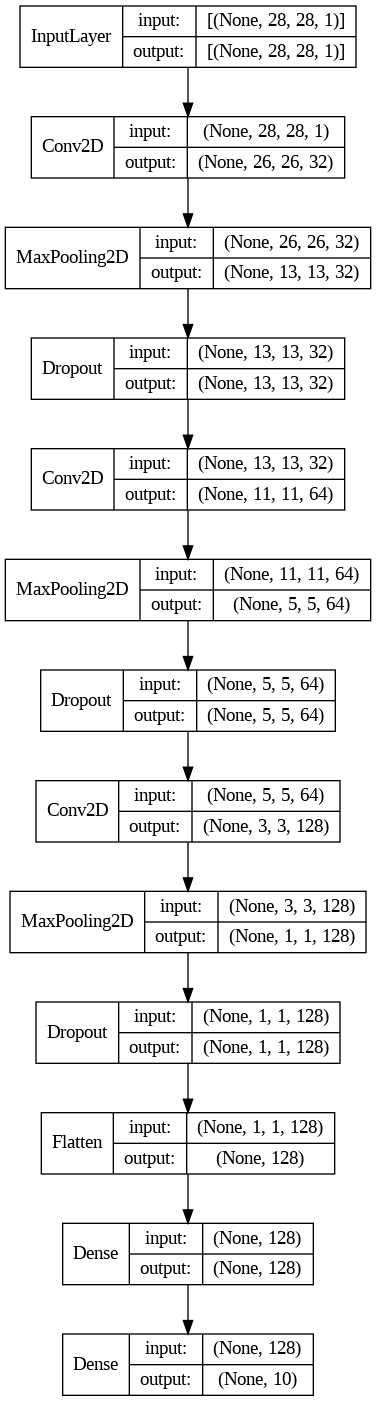

In [9]:
# architecture du reseau de neurones (graphique 1/2)
tf.keras.utils.plot_model(modele, to_file='model.png', show_shapes=True, show_layer_names=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 6.2 MB/s eta 0:00:00


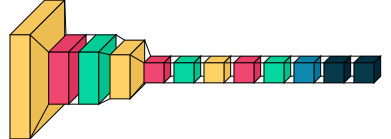

In [11]:
#!pip install visualkeras
import visualkeras

visualkeras.layered_view(modele).show() # display using your system viewer
visualkeras.layered_view(modele, to_file='output.png') # write to disk
visualkeras.layered_view(modele, to_file='output.png').show() # write and show

visualkeras.layered_view(modele)

ENTRAINER LE CNN

In [12]:
# Add an empty color dimension as the Convolutional net is expecting this
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Train the CNN on the training data
history = modele.fit(

      # Training data : features (images) and classes.
      x_train, y_train,

      # number of samples to work through before updating the
      # internal model parameters via back propagation.
      batch_size=64,

      # An epoch is an iteration over the entire training data.
      epochs=20,

      # The model will set apart his fraction of the training
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of
      # each epoch.
      validation_split=0.2,

      verbose=1)

Epoch 1/20
750/750 [==============================] - 18s 6ms/step - loss: 1.0616 - accuracy: 0.6802 - val_loss: 0.5552 - val_accuracy: 0.8073
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.5811 - accuracy: 0.7905 - val_loss: 0.4653 - val_accuracy: 0.8307
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5176 - accuracy: 0.8114 - val_loss: 0.4171 - val_accuracy: 0.8499
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4725 - accuracy: 0.8282 - val_loss: 0.3814 - val_accuracy: 0.8616
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4505 - accuracy: 0.8352 - val_loss: 0.3771 - val_accuracy: 0.8634
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4342 - accuracy: 0.8384 - val_loss: 0.3676 - val_accuracy: 0.8626
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4173 - accuracy: 0.8441 - val_loss: 0.3534 - val_accuracy: 0.8678
Epoch

* **batch_size :** Il s'agit du nombre d'échantillons d'entraînement qui seront traités en même temps par le modèle avant de mettre à jour les poids du réseau. En d'autres termes, lors de l'entraînement, les données d'entraînement sont divisées en lots (ou mini-lots) de taille batch_size, et le modèle est mis à jour après avoir traité chaque lot. Le choix d'une taille de lot appropriée dépend de divers facteurs, notamment la mémoire disponible, la taille du jeu de données et les caractéristiques du modèle.

* **epochs :** Une époque correspond à une itération complète sur l'ensemble du jeu de données d'entraînement. Pendant une époque, le modèle traite tous les échantillons d'entraînement une fois. Le nombre d'époques spécifie combien de fois le modèle va parcourir tout le jeu de données d'entraînement. Il est courant d'entraîner un modèle sur plusieurs époques pour améliorer progressivement sa performance.

* **num_classes :** Cela représente le nombre de classes dans votre problème de classification. Par exemple, si vous effectuez une classification d'images et qu'il y a 10 catégories différentes, alors num_classes serait défini sur 10. Cela est souvent utilisé pour spécifier le nombre de neurones dans la couche de sortie d'un réseau de neurones lorsqu'il est utilisé pour la classification.

* **Sequential :** C'est un modèle linéaire séquentiel, généralement utilisé pour construire des réseaux de neurones à une seule direction où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie. Les couches sont empilées les unes sur les autres de manière séquentielle. C'est le choix le plus simple pour créer des modèles dans Keras.

* **Input :** Cette classe est utilisée pour créer un tenseur d'entrée Keras, qui est une interface permettant de définir la forme et le type de données attendus par le modèle. Elle est généralement utilisée lorsque vous créez un modèle Keras fonctionnel, où les couches sont connectées de manière non linéaire.

* **Model :** C'est la classe principale utilisée pour instancier un modèle Keras fonctionnel. Elle prend un ou plusieurs tenseurs d'entrée et un ou plusieurs tenseurs de sortie, et définit le modèle en reliant les entrées aux sorties via un graphe de calcul constitué de couches.

EVALUATION DU MODELE A PARTIR DU TEST SET

In [26]:
# Get Model Predictions for test data
predicted_classes = modele.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis = 1)
print(classification_report(y_test, predicted_classes, target_names=class_names))

313/313 [==============================] - 1s 2ms/step
                precision    recall  f1-score   support

T-shirt / haut       0.82      0.87      0.85      1000
      Pantalon       1.00      0.96      0.98      1000
      Pullover       0.83      0.78      0.80      1000
          Robe       0.88      0.91      0.90      1000
       Manteau       0.76      0.79      0.77      1000
       Sandale       0.99      0.93      0.96      1000
       Chemise       0.65      0.64      0.64      1000
       Sneaker       0.91      0.98      0.94      1000
           Sac       0.98      0.97      0.98      1000
       Bottine       0.96      0.95      0.96      1000

      accuracy                           0.88     10000
     macro avg       0.88      0.88      0.88     10000
  weighted avg       0.88      0.88      0.88     10000



In [28]:
modele.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3257 - accuracy: 0.8776


[0.32566210627555847, 0.8776000142097473]